# Bonus
#### As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import psycopg2
import config
from matplotlib import pyplot as plt

In [3]:
# Import the SQL database into Pandas.
password = config.password
conn = psycopg2.connect(f'dbname=employee_db port=5432 user=postgres password={password}')

Text(0, 0.5, 'Number of Employees')

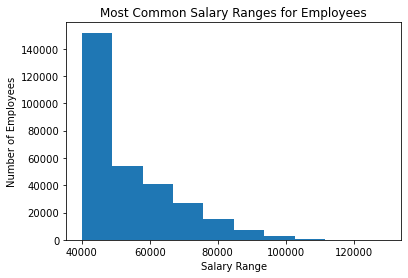

In [4]:
# Create a histogram to visualize the most common salary ranges for employees.
salaries = pd.read_sql('SELECT * FROM salaries', conn)
plt.hist(salaries['salary'], label='Salary Range')
plt.title('Most Common Salary Ranges for Employees')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees')

Text(0.5, 1.0, 'Avg Salary by Title')

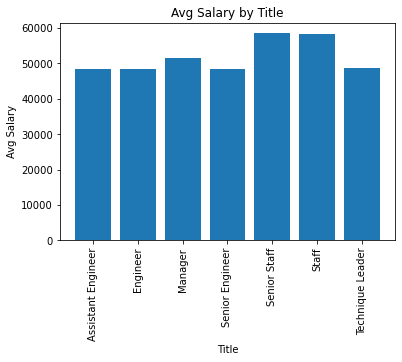

In [32]:
# Create a bar chart of average salary by title.
salaries_titles = pd.read_sql('SELECT t.title AS "Title", ROUND(AVG(s.salary), 2) AS "Avg Salary"\
                                FROM employees AS e\
                                JOIN salaries AS s\
                                ON e.emp_no = s.emp_no\
                                JOIN titles AS t\
                                ON e.emp_title = t.title_id\
                                GROUP BY t.title', conn)

plt.bar(salaries_titles['Title'], salaries_titles['Avg Salary'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Title')
plt.ylabel('Avg Salary')
plt.title('Avg Salary by Title')

### Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [44]:
my_salary = pd.read_sql('SELECT s.emp_no AS "My ID", e.first_name AS "First Name", e.last_name AS "Last Name", t.title AS "Title", s.salary AS "Salary"\
                        FROM salaries AS s\
                        JOIN employees AS e\
                        ON e.emp_no = s.emp_no\
                        JOIN titles AS t\
                        ON t.title_id = e.emp_title\
                        WHERE e.emp_no = 499942', conn)

my_salary

,My ID,First Name,Last Name,Title,Salary
0,499942,April,Foolsday,Technique Leader,40000


### So boss was playing a prank on me. Changed my name to April Follsday.
### But also I'm paid lower than average for my title, if that part of the data is true.
### So quit, who's laughing now?